In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mineralML as mm
import Thermobar as pt


In [55]:
mm.__version__

'0.0.0.7'

In [56]:
pt.__version__

'1.0.52'

## To extract data

In [57]:
result = pt.process_excel_file(r'KAM_Nov2124_EDS.xlsx', sheet_name="Samples")
sorted_df = pt.sort_columns(result)
sorted_df['SampleID']=sorted_df['Sample Name']
sorted_df.head()


,Sample Name,Total_wt%,Total_Oxide%,Al2O3,CaO,Cl,Cr2O3,Cu,FeOt,K2O,...,#_ions__Ca,#_ions__Ti,#_ions__Cr,#_ions__Mn,#_ions__Fe,#_ions__P,#_ions__Cu,#_ions__Ni,#_ions__Sc,SampleID
0,KA79_c216_MIB,98.7399,98.2505,15.5121,14.6520,0.0,0.0792,NaN,6.8802,0.2343,...,0.19,0.03,0.0,0,0.07,NaN,NaN,NaN,NaN,KA79_c216_MIB
1,KA79_c216_MIB_WDS,98.6707,98.1813,15.5124,14.6511,0.0,0.0793,NaN,6.8802,0.2343,...,0.19,0.03,0.0,0,0.07,NaN,NaN,NaN,NaN,KA79_c216_MIB_WDS
2,AMG_XEN4,100.4817,100.4817,16.1847,12.8752,NaN,0.0683,NaN,6.6328,0.4724,...,0.16,0.02,0.0,0,0.06,0.00,NaN,NaN,NaN,AMG_XEN4
3,AMG_XEN4_WDS,100.2025,100.1930,16.1875,12.8735,0.0,0.0683,NaN,6.6328,0.4725,...,0.16,0.02,0.0,0,0.07,NaN,NaN,NaN,NaN,AMG_XEN4_WDS
4,KA611_c217_MIA,98.8911,98.8105,13.8608,12.6734,0.0,NaN,NaN,10.2503,1.2869,...,0.17,0.02,NaN,0,0.11,0.01,NaN,NaN,NaN,KA611_c217_MIA


In [58]:
sorted_df.to_clipboard(excel=True)

## Now run through mineral ML

In [59]:
df_final=pt.minClass(sorted_df)

/opt/anaconda3/envs/py3124/lib/python3.12/site-packages/mineralML/core.py:285: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  check_point = torch.load(path)


## Extract standards and paste into this sheet - 
 https://docs.google.com/spreadsheets/d/1V6m2yhYWO6vrLcbZ-0ccXu5zADcnHxmloiOhQwrKl8U/edit?usp=sharing

In [60]:
# Put your name and analysis date here - if it spans multiple days in a single sesion, dont worry, the first day is fine, your standards should be named mon_morn, mon_afternoon etc. anyway. 
PersonName='Charlotte'
AnalysisDate='11/21/2024'

## For each standard, write the Name, and also the string in your name 'e.g. if your san carlos are called SC, you would put StdString 'SC'
- Copy and paste these cells for as many standards as you have - p.s. right now, only works for silicates, I need to format for Other oxides. 

In [61]:

df_final['SampleID'].unique()

array(['KA79_c216_MIB', 'KA79_c216_MIB_WDS', 'AMG_XEN4', 'AMG_XEN4_WDS',
       'KA611_c217_MIA', 'KA611_c217_MIA_WDS', 'KA79_c223_MIA',
       'KA79_c223_MIA_WDS', 'KA69_c205_MIB', 'KA69_c205_MIB_WDS',
       'KA69_c205_MIC', 'KA69_c205_MIC_WDS', 'KA69_c205_matglass',
       'KA69_c205_matglass_WDS', 'KA79_c222_MIA', 'KA79_c222_MIA_WDS',
       'KA69_c204_MIC', 'KA69_c204_MIC_WDS', 'KA69_c209_MIA',
       'KA69_c209_MIA_WDS', 'KA69_c209_MIB', 'KA69_c209_MIB_WDS',
       'KA78_c101_MIA', 'KA78_c101_MIA_WDS', 'KA71_c216_MI1',
       'KA71_c216_MI1_WDS', 'KA71_c216_MI2', 'KA71_c216_MI2_WDS',
       'KA79_c203b_MIC', 'KA79_c203b_MIC_WDS', 'KA79_c203b_MID',
       'KA79_c203b_MID_WDS', 'KA611_c218_MIA', 'KA611_c218_MIA_WDS',
       'KA611_c208_MIA', 'KA611_c208_MIA_WDS', 'KA611_c212_MIC',
       'KA611_c212_MIC_WDS', 'KA611_c212_MIC_spot2',
       'KA611_c212_MIC_spot2_WDS', 'KA611_c212_MIA', 'KA611_c212_MIA_WDS',
       'KA611_c210_MIB', 'KA611_c210_MIB_WDS',
       'KA611_c207_MIA_might 

In [62]:
StdName='forsterite'
StdString='forsterite'
Mac_Fo=pt.extract_silicate_standard_data(df_final, PersonName, StdName, AnalysisDate, StdString)
Mac_Fo.to_clipboard(excel=True)

,AnalysisDate,PersonName,SampleID,Total_Oxide%,MgO,SiO2,TiO2,Al2O3,CaO,MnO,...,Standard Name_K,Standardization Date_K,Standard Name_Fe,Standardization Date_Fe,Standard Name_Ni,Standardization Date_Ni,Standard Name_S,Standardization Date_S,Standard Name_Cr,Standardization Date_Cr


In [63]:
StdName='JD'
StdString='JD'
Mac_Fo=pt.extract_silicate_standard_data(df_final, PersonName, StdName, AnalysisDate, StdString)
Mac_Fo.to_clipboard(excel=True)

,AnalysisDate,PersonName,SampleID,Total_Oxide%,MgO,SiO2,TiO2,Al2O3,CaO,MnO,...,Standard Name_K,Standardization Date_K,Standard Name_Fe,Standardization Date_Fe,Standard Name_Ni,Standardization Date_Ni,Standard Name_S,Standardization Date_S,Standard Name_Cr,Standardization Date_Cr


In [64]:
StdName='For'
StdString='Fo'
Mac_Fo=pt.extract_silicate_standard_data(df_final, PersonName, StdName, AnalysisDate, StdString)
Mac_Fo.to_clipboard(excel=True)

,AnalysisDate,PersonName,SampleID,Total_Oxide%,MgO,SiO2,TiO2,Al2O3,CaO,MnO,...,Standard Name_K,Standardization Date_K,Standard Name_Fe,Standardization Date_Fe,Standard Name_Ni,Standardization Date_Ni,Standard Name_S,Standardization Date_S,Standard Name_Cr,Standardization Date_Cr


## Compare EDS and WDS

Text(0, 0.5, 'EDS SO3 (wt%)')

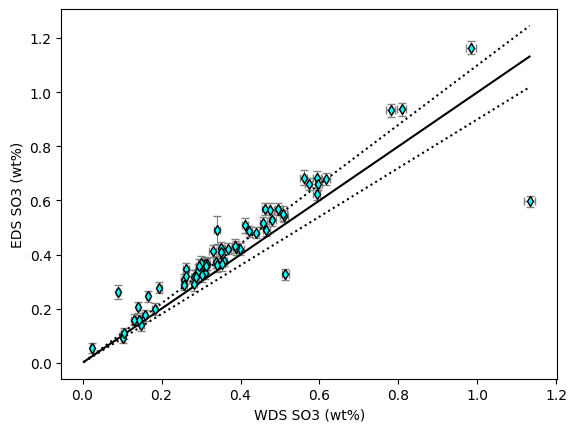

In [65]:

ele='S'
oxide='SO3'
# std_str='JDFD2'

df = df_final.copy()
df_Ele_WDS = df.loc[df[f'Signal Type_{ele}'] == 'WDS'].copy()
df_Ele_EDS = df.loc[df[f'Signal Type_{ele}'] == 'EDS'].copy()

df_Ele_WDS['simplename'] = df_Ele_WDS['Sample Name'].str.replace(r'_WDS$', '', regex=True)
df_Ele_EDS['simplename'] = df_Ele_EDS['Sample Name']


df_combined_WDS_EDS = pd.merge(df_Ele_WDS, df_Ele_EDS, on='simplename', how='left', suffixes=["_WDS", "_EDS"])

## Now make a plot
# Plot the main points
plt.plot(df_combined_WDS_EDS[f'{oxide}_WDS'], df_combined_WDS_EDS[f'{oxide}_EDS'], '.r')

# Plot the error bars
plt.errorbar(df_combined_WDS_EDS[f'{oxide}_WDS'], df_combined_WDS_EDS[f'{oxide}_EDS'], 
             xerr=df_combined_WDS_EDS[f'Oxide % Sigma_{oxide}_WDS'], 
             yerr=df_combined_WDS_EDS[f'Oxide % Sigma_{oxide}_EDS'],
             fmt='d', ecolor='grey', elinewidth=0.8, mfc='cyan', ms=5, mec='k', capsize=3)

# # Add the standards
# plt.plot(df_combined_WDS_EDS[f'{oxide}_WDS'].loc[df_combined_WDS_EDS['Sample Name_WDS'].str.contains(std_str)],
#           df_combined_WDS_EDS[f'{oxide}_EDS'].loc[df_combined_WDS_EDS['Sample Name_WDS'].str.contains(std_str)], 
#           'dk', mfc='b', zorder=100)

# Plot the reference lines
max=np.max(df_combined_WDS_EDS[f'{oxide}_WDS'])
min=np.min(df_combined_WDS_EDS[f'{oxide}_WDS'])
plt.plot([min-0.02, max], [min-0.02, max], '-k')
plt.plot([min-0.02, max], [min-0.02, max* 1.1], ':k')
plt.plot([min-0.02, max], [min-0.02, max * 0.9], ':k')

# Set the labels dynamically
plt.xlabel(f'WDS {oxide} (wt%)')
plt.ylabel(f'EDS {oxide} (wt%)')



In [66]:
# Nov2122_WDSEDS_S_standards=df_combined_WDS_EDS.copy()
Nov2122_WDSEDS_S_samples=df_combined_WDS_EDS.copy()
Nov2122_combo_df=pd.concat([Nov2122_WDSEDS_S_standards,Nov2122_WDSEDS_S_samples],axis=0)
Nov2122_combo_df.to_excel("Nov2122_WDSEDS_S.xlsx")
Nov2122_combo_df

,Sample Name_WDS,Predict_Mineral_WDS,Predict_Probability_WDS,Total_wt%_WDS,Total_Oxide%_WDS,Al2O3_WDS,CaO_WDS,Cu_WDS,FeOt_WDS,K2O_WDS,...,Apparent Concentration_Sc_EDS,Factory Standard_Cl_EDS,Factory Standard_Cr_EDS,Factory Standard_Sc_EDS,Line_Cl_EDS,Line_Cr_EDS,Line_Sc_EDS,#_ions__Cl_EDS,#_ions__Cr_EDS,#_ions__Sc_EDS
0,JDF_g2_thu_noon_4_WDS_startrun1_WDS,Amphibole,0.910793,99.9795,99.9795,14.0886,10.6026,NaN,11.9646,0.1931,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JDF_g2_thu_noon_4_WDS_endrun1_WDS,Amphibole,0.910794,99.9840,99.9840,14.0886,10.6027,NaN,11.9646,0.1931,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JDF_g2_thu_noon_4_WDS_endrun1_50nA_WDS,Amphibole,0.910798,99.9887,99.9887,14.0885,10.6027,NaN,11.9647,0.1931,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,JDF_g2_thu_aftnoon_5_WDS,Amphibole,0.914790,99.7404,99.7404,14.3102,10.7200,NaN,12.1740,0.1984,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,JDF_g2_thu_aftnoon_6_WDS,Amphibole,0.911810,99.6482,99.6482,14.0452,10.6037,NaN,12.0336,0.2099,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,KA71_c203x2_MI1_WDS,Amphibole,0.898445,99.5356,99.4939,12.4507,12.6925,NaN,11.1159,0.5759,...,NaN,Yes,Yes,NaN,K series,K series,NaN,0.0,0.0,NaN
59,KA71_c204_MI1_WDS,Amphibole,0.877520,95.6210,95.5897,12.5716,11.9676,NaN,8.1338,0.4948,...,0.06,Yes,Yes,Yes,K series,K series,K series,0.0,0.0,0.0
60,KA71_c205_MI4_WDS,Amphibole,0.937128,97.9150,97.9007,12.2249,11.9860,NaN,10.8271,0.4510,...,NaN,Yes,NaN,NaN,K series,NaN,NaN,0.0,NaN,NaN
61,KA71_c206_MI1_WDS,Amphibole,0.822246,98.4160,98.3887,14.5270,12.9799,NaN,7.4726,0.4663,...,NaN,Yes,Yes,NaN,K series,K series,NaN,0.0,0.0,NaN


In [40]:
Nov2122_WDSEDS_S_standards

,Sample Name_WDS,Predict_Mineral_WDS,Predict_Probability_WDS,Total_wt%_WDS,Total_Oxide%_WDS,Al2O3_WDS,CaO_WDS,Cu_WDS,FeOt_WDS,K2O_WDS,...,#_ions__Al_EDS,#_ions__P_EDS,#_ions__K_EDS,#_ions__Ti_EDS,#_ions__S_EDS,SampleID_EDS,Cr2O3_EDS,PersonName_EDS,StdName_EDS,AnalysisDate_EDS
0,JDF_g2_thu_noon_4_WDS_startrun1,Amphibole,0.921499,99.9795,99.9795,14.0886,10.6026,NaN,11.9646,0.1931,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JDF_g2_thu_noon_4_WDS_endrun1,Amphibole,0.921500,99.9840,99.9840,14.0886,10.6027,NaN,11.9646,0.1931,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JDF_g2_thu_noon_4_WDS_endrun1_WDS,Amphibole,0.921503,99.9887,99.9887,14.0885,10.6027,NaN,11.9647,0.1931,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,JDF_g2_thu_aftnoon_5_WDS,Amphibole,0.923503,99.7404,99.7404,14.3102,10.7200,NaN,12.1740,0.1984,...,0.2,NaN,0.0,0.02,0.0,JDF_g2_thu_aftnoon_5,0.0,Charlotte,For,11/21/2024
4,JDF_g2_thu_aftnoon_6_WDS,Amphibole,0.922129,99.6482,99.6482,14.0452,10.6037,NaN,12.0336,0.2099,...,0.2,NaN,0.0,0.02,0.0,JDF_g2_thu_aftnoon_6,0.0,Charlotte,For,11/21/2024
5,JDF_g2_thu_aftnoon_7_WDS,Amphibole,0.922603,99.4628,99.4628,14.0396,10.5593,NaN,11.9751,0.1970,...,0.2,NaN,0.0,0.02,0.0,JDF_g2_thu_aftnoon_7,0.0,Charlotte,For,11/21/2024
6,JDF_g2_fri_noon_4_WDS_start_1_WDS,Amphibole,0.920162,100.2111,100.2111,14.1574,10.6523,NaN,12.0001,0.2041,...,0.2,NaN,0.0,0.02,0.0,JDF_g2_fri_noon_4_WDS_start_1,0.0,Charlotte,For,11/21/2024
7,JDF_g2_fri_noon_5_WDS_start_2_WDS,Amphibole,0.920859,100.0477,100.0477,14.1407,10.5776,NaN,12.0858,0.2127,...,0.2,NaN,0.0,0.02,0.0,JDF_g2_fri_noon_5_WDS_start_2,0.0,Charlotte,For,11/21/2024
8,JDF_g2_fri_noon_6_WDS_middle_1_WDS,Amphibole,0.920634,100.2659,100.2659,14.1454,10.6714,NaN,12.0081,0.2184,...,0.2,NaN,0.0,0.02,0.0,JDF_g2_fri_noon_6_WDS_middle_1,0.0,Charlotte,For,11/21/2024
9,JDF_g2_fri_noon_7_WDS_middle_2_WDS,Amphibole,0.921154,100.1001,100.1001,14.1060,10.5951,NaN,12.0208,0.2061,...,0.2,NaN,0.0,0.02,0.0,JDF_g2_fri_noon_7_WDS_middle_2,0.0,Charlotte,For,11/21/2024


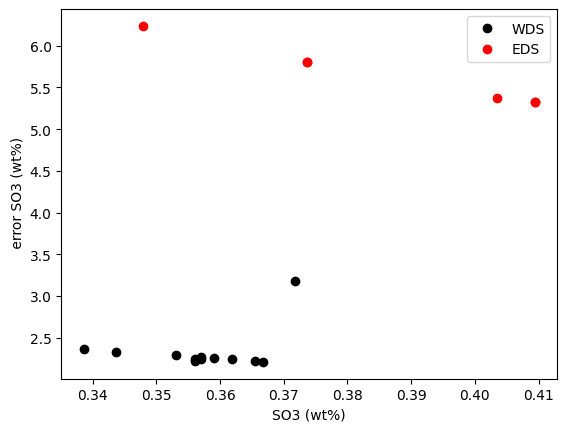

In [27]:

oxide='SO3'
plt.plot(df_combined_WDS_EDS[f'{oxide}_WDS'],100*df_combined_WDS_EDS[f'Oxide % Sigma_{oxide}_WDS']/df_combined_WDS_EDS[f'{oxide}_WDS'], 'ok', label='WDS')
plt.plot(df_combined_WDS_EDS[f'{oxide}_EDS'],100*df_combined_WDS_EDS[f'Oxide % Sigma_{oxide}_EDS']/df_combined_WDS_EDS[f'{oxide}_EDS'], 'or', label='EDS')

plt.xlabel('Concentration ')

plt.xlabel(f'{oxide} (wt%)')
plt.ylabel(f' error {oxide} (wt%)')
plt.legend()